In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *

N = 10

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
DC = DirichletC(N)

# Space
x = CH.x
f = (x-1)*0.5

# Boundary conditions
bc = np.zeros(2)
bc[0] = -1

# Transform
fhatch = CH.forward_fft(f)
fhatcd = CD.forward_fft(f,bc=bc)



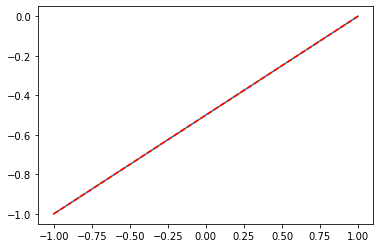

In [2]:
plt.plot(x,f)
plt.plot(x,CH.backward_fft(fhatch),"--")
plt.plot(x,CD.backward_fft(fhatcd,bc=bc),"r--")
plt.show()

## 2-Dimensional

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


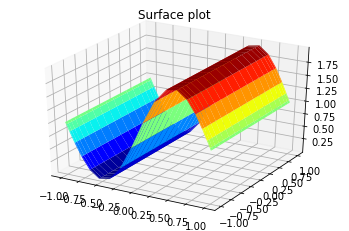

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from pypde.bases import *
from mpl_toolkits.mplot3d import Axes3D

N = 20

# Bases
CH = SpectralBase(N,"CH")
CD = SpectralBase(N,"CD")
CN = SpectralBase(N,"CN")
DC = DirichletC(N)

# Space
x = CH.x
y = CD.x
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi*xx )+1#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,N))
bc[0,:] = x
bchat = CD.forward_fft(bc.T).T

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, f,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fhatcd = CD.forward_fft(f)
fhat = CH.forward_fft(f)
fcd = CD.backward_fft(fhatcd)

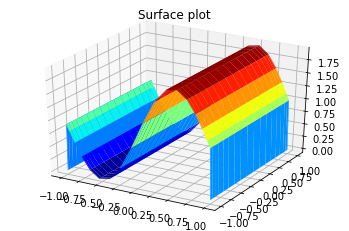

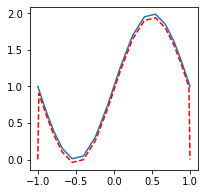

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(xx, yy, fcd,cmap='jet', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

fig,ax = plt.subplots(figsize=(3,3))
ax.plot(x,f[:,1])
ax.plot(x,fcd[:,1],"r--")
plt.show()